## Data Preprocessing

In [44]:
import pandas as pd
from process import read_data

data_folder = "../data/earning/"
years = range(2011, 2025)
target_col = ['REGULAR','RETRO','OTHER','OVERTIME','INJURED','DETAIL','QUINN_EDUCATION','TOTAL_GROSS']
drop_col = ['_ID', 'POSTAL']
encoding = 'ISO-8859-1'

dataframes = read_data(data_folder, 'earnings.csv', years, encoding, target_col, drop_col)

Read data from: ../data/earning/2011_earnings.csv
Read data from: ../data/earning/2012_earnings.csv
Read data from: ../data/earning/2013_earnings.csv
Read data from: ../data/earning/2014_earnings.csv
Read data from: ../data/earning/2015_earnings.csv
Read data from: ../data/earning/2016_earnings.csv
Read data from: ../data/earning/2017_earnings.csv
Read data from: ../data/earning/2018_earnings.csv
Read data from: ../data/earning/2019_earnings.csv
Read data from: ../data/earning/2020_earnings.csv
Read data from: ../data/earning/2021_earnings.csv
Read data from: ../data/earning/2022_earnings.csv
Read data from: ../data/earning/2023_earnings.csv
Read data from: ../data/earning/2024_earnings.csv
Successfully read data from all files.


In [45]:
# Concatenate all dataframes into one
full_df = pd.concat(dataframes, ignore_index=True)

#print the data type of each column
print("\nData Types:")
print(full_df.dtypes)

# display random 10 rows from 2023
print("\nSample from 2012:")
display(full_df[full_df['YEAR'] == 2012].sample(10))


Data Types:
NAME                object
DEPARTMENT_NAME     object
TITLE               object
REGULAR            float64
RETRO              float64
OTHER              float64
OVERTIME           float64
INJURED            float64
DETAIL             float64
QUINN_EDUCATION    float64
TOTAL_GROSS        float64
YEAR                 int64
dtype: object

Sample from 2012:


,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION,TOTAL_GROSS,YEAR
21819,"Man,Yee Mui Loue",Boston Public Library,Spec Library Asst I,46013.91,NaN,240.00,NaN,NaN,NaN,NaN,46253.91,2012
21294,"Tesfaye,Mamenasha",Boston Cntr - Youth & Families,Lifeguard II,28905.30,120.65,NaN,NaN,NaN,NaN,NaN,29025.95,2012
28783,"Settipani,Thomas W.",Boston Police Department,PoliceSergeant/SupvCourtCases,87823.20,NaN,8350.41,NaN,NaN,NaN,8782.54,104956.15,2012
35345,"Martin,Tara Clifford",Boston Public Schools,Teacher,82836.20,NaN,700.00,NaN,NaN,NaN,NaN,83536.20,2012
34710,"Emmanuel,Haynes J",Boston Public Schools,Teacher,81722.33,NaN,NaN,NaN,NaN,NaN,NaN,81722.33,2012
22614,"Lavache,Jacqueline N.",Inspectional Services Dept,Prin Clerk & Typist,25552.52,197.72,715.01,60.15,NaN,NaN,NaN,26525.40,2012
28636,"Rivera,Luis A",Boston Police Department,Police Officer,71817.85,NaN,800.00,7541.71,NaN,3234.0,NaN,83393.56,2012
25308,"Hernandez,Mariano",Boston Fire Department,Fire Fighter,90825.48,NaN,2299.63,16345.01,NaN,1304.0,NaN,110774.12,2012
31371,"Wornum,Dennis",Boston Public Schools,Officer-Bps Police,40320.08,NaN,600.00,674.32,NaN,NaN,NaN,41594.40,2012
38946,"Santos,Daniel A",Boston Public Schools,Teacher,4817.54,NaN,NaN,NaN,NaN,NaN,NaN,4817.54,2012


In [46]:
# 1. Compute annual summaries per department (summing TOTAL_GROSS and OVERTIME)
department_summaries = {}
for year, df_year in full_df.groupby('YEAR'):
    summary = (
        df_year
        .groupby('DEPARTMENT_NAME')[['TOTAL_GROSS', 'OVERTIME']]
        .sum()
        .reset_index()
    )
    department_summaries[year] = summary

# 2. For each year, select the top 5 departments by overtime pay
top_departments = {
    year: df.nlargest(5, 'OVERTIME')['DEPARTMENT_NAME'].tolist()
    for year, df in department_summaries.items()
}

# 3. Build yearly summary tables that include only those top 5 departments
top_department_data = {
    year: df[df['DEPARTMENT_NAME'].isin(top_departments[year])].copy()
    for year, df in department_summaries.items()
}

# 4. Find departments that appear in the top 5 every year
years_list = sorted(top_departments.keys())
common_departments = set(top_departments[years_list[0]])
for year in years_list[1:]:
    common_departments &= set(top_departments[year])

print(f"Departments in the overtime top 5 every year: {common_departments}")

# 5. For each of those ‘consistent’ departments, concatenate their yearly data
department_dataframes = {}
for dept in common_departments:
    pieces = []
    for year, df in top_department_data.items():
        sub = df[df['DEPARTMENT_NAME'] == dept]
        if not sub.empty:
            sub = sub.copy()
            sub['YEAR'] = year
            pieces.append(sub)
    if pieces:
        department_dataframes[dept] = pd.concat(pieces, ignore_index=True)

# 6. Display each department’s DataFrame
for dept, df in department_dataframes.items():
    print(f"\n===== Department: {dept} =====")
    display(df)

Departments in the overtime top 5 every year: {'Public Works Department', 'Boston Police Department', 'Boston Fire Department', 'Property Management'}

===== Department: Public Works Department =====


,DEPARTMENT_NAME,TOTAL_GROSS,OVERTIME,YEAR
0,Public Works Department,21637431.56,2936045.81,2011
1,Public Works Department,20839543.57,1727033.69,2012
2,Public Works Department,22160388.68,3149769.31,2013
3,Public Works Department,24888293.92,3833240.06,2014
4,Public Works Department,27029986.10,5243898.07,2015
5,Public Works Department,25931149.01,4161927.40,2016
6,Public Works Department,26674448.16,5114656.36,2017
7,Public Works Department,27067680.29,5255554.84,2018
8,Public Works Department,26285862.95,4506512.51,2019
9,Public Works Department,26098861.91,3444542.88,2020



===== Department: Boston Police Department =====


,DEPARTMENT_NAME,TOTAL_GROSS,OVERTIME,YEAR
0,Boston Police Department,2.905179e+08,4.223736e+07,2011
1,Boston Police Department,2.958616e+08,4.469742e+07,2012
2,Boston Police Department,3.077962e+08,5.748377e+07,2013
3,Boston Police Department,3.578099e+08,5.791461e+07,2014
4,Boston Police Department,3.581379e+08,6.160814e+07,2015
5,Boston Police Department,3.885872e+08,6.098992e+07,2016
6,Boston Police Department,3.912776e+08,6.693365e+07,2017
7,Boston Police Department,4.166830e+08,7.785544e+07,2018
8,Boston Police Department,4.157256e+08,7.776430e+07,2019
9,Boston Police Department,4.162761e+08,7.805770e+07,2020



===== Department: Boston Fire Department =====


,DEPARTMENT_NAME,TOTAL_GROSS,OVERTIME,YEAR
0,Boston Fire Department,1.731703e+08,20940928.99,2011
1,Boston Fire Department,1.791011e+08,21408244.96,2012
2,Boston Fire Department,1.778649e+08,20388822.87,2013
3,Boston Fire Department,2.097233e+08,21318731.45,2014
4,Boston Fire Department,2.094536e+08,24815833.23,2015
5,Boston Fire Department,2.114572e+08,23762982.32,2016
6,Boston Fire Department,2.151573e+08,22829249.92,2017
7,Boston Fire Department,2.199342e+08,23679890.59,2018
8,Boston Fire Department,2.655112e+08,30274873.99,2019
9,Boston Fire Department,2.642356e+08,33761132.79,2020



===== Department: Property Management =====


,DEPARTMENT_NAME,TOTAL_GROSS,OVERTIME,YEAR
0,Property Management,14173062.33,1509684.21,2011
1,Property Management,14727492.81,1771431.66,2012
2,Property Management,15225876.72,2136854.78,2013
3,Property Management,15103896.30,1948891.72,2014
4,Property Management,14867023.90,2131552.41,2015
5,Property Management,10103922.14,1814680.76,2016
6,Property Management,10570764.93,1917753.05,2017
7,Property Management,11080659.67,1943773.68,2018
8,Property Management,11006087.59,2075398.70,2019
9,Property Management,10775455.78,2506471.06,2020


## Overtime Analysis

In [47]:
import plotly.graph_objects as go

def plot_department_overtime_interactive(department_dataframes):
    """
    department_dataframes: dict
      key   = department name (str)
      value = DataFrame with 'YEAR' and 'OVERTIME' columns
    """
    # Create an empty Figure
    fig = go.Figure()

    # Add one line trace per department
    for dept, df in department_dataframes.items():
        df_sorted = df.sort_values('YEAR')
        fig.add_trace(
            go.Scatter(
                x=df_sorted['YEAR'],
                y=df_sorted['OVERTIME'],
                mode='lines+markers',
                name=dept,
                hovertemplate=
                    '<b>%{text}</b><br>' +
                    'Year: %{x}<br>' +
                    'Overtime Pay: $%{y:,.2f}<extra></extra>',
                text=[dept] * len(df_sorted)
            )
        )

    # Update layout for titles and axes
    fig.update_layout(
        title="Overtime Pay Trends for Consistently Top Departments (2011–2024)",
        xaxis_title="Year",
        yaxis_title="Overtime Pay (USD)",
        xaxis=dict(tickmode='linear'),
        template='plotly_white',
        legend_title="Department",
        hovermode='x unified'
    )

    fig.show()

# Example call
plot_department_overtime_interactive(department_dataframes)

## BPD Overtime Forecast

In [48]:
from regression import run_overtime_forecast

results = run_overtime_forecast(
    department_name='Boston Police Department',
    dept_dfs=department_dataframes,
    forecast_years=2,
    test_degrees=[2, 3, 4],
    interactive=True
)

Best polynomial degree: 4

Predicted future values:
Year 2025: $109,631,422.77
Year 2026: $123,230,936.16

Best model equation:
y = -1.23e+14 + 1.16e+05x^1 + 1.81e+08x^2 + -1.19e+05x^3 + 2.22e+01x^4



=== Forecast Summary for Boston Police Department ===
* Best polynomial degree: 4
* R² score             : 0.9301
* Model equation       : y = -1.23e+14 + 1.16e+05x^1 + 1.81e+08x^2 + -1.19e+05x^3 + 2.22e+01x^4


## BFD Overtime Forecast

In [49]:
results = run_overtime_forecast(
    department_name='Boston Fire Department',
    dept_dfs=department_dataframes,
    forecast_years=2,
    test_degrees=[2, 3, 4],
    interactive=True
)

Best polynomial degree: 4

Predicted future values:
Year 2025: $47,546,064.46
Year 2026: $49,219,290.30

Best model equation:
y = 3.87e+13 + -3.65e+04x^1 + -5.69e+07x^2 + 3.76e+04x^3 + -6.97e+00x^4



=== Forecast Summary for Boston Fire Department ===
* Best polynomial degree: 4
* R² score             : 0.9442
* Model equation       : y = 3.87e+13 + -3.65e+04x^1 + -5.69e+07x^2 + 3.76e+04x^3 + -6.97e+00x^4


## Property Management Overtime Forecast

In [50]:
results = run_overtime_forecast(
    department_name="Property Management",
    dept_dfs=department_dataframes,
    forecast_years=2,
    test_degrees=[2, 3, 4],
    interactive=True
)

Best polynomial degree: 3

Predicted future values:
Year 2025: $3,140,879.32
Year 2026: $3,493,237.97

Best model equation:
y = -1.06e+13 + 1.58e+10x^1 + -7.82e+06x^2 + 1.29e+03x^3



=== Forecast Summary for Property Management ===
* Best polynomial degree: 3
* R² score             : 0.8246
* Model equation       : y = -1.06e+13 + 1.58e+10x^1 + -7.82e+06x^2 + 1.29e+03x^3


## Public Works Department Overtime Forecast

In [51]:
results = run_overtime_forecast(
    department_name='Public Works Department',
    dept_dfs=department_dataframes,
    forecast_years=2,
    test_degrees=[2, 3, 4],
    interactive=True
)

Best polynomial degree: 4

Predicted future values:
Year 2025: $7,973,137.94
Year 2026: $9,883,230.89

Best model equation:
y = -2.24e+13 + 2.11e+04x^1 + 3.30e+07x^2 + -2.18e+04x^3 + 4.05e+00x^4



=== Forecast Summary for Public Works Department ===
* Best polynomial degree: 4
* R² score             : 0.7005
* Model equation       : y = -2.24e+13 + 2.11e+04x^1 + 3.30e+07x^2 + -2.18e+04x^3 + 4.05e+00x^4


Overtime Hours

In [52]:
df2012 = pd.read_excel("../data/Overtime/2012_Details.xlsx")
df2013 = pd.read_excel("../data/Overtime/2013_Details.xlsx")
df2014 = pd.read_excel("../data/Overtime/2014_Details.xlsx")
df2015 = pd.read_excel("../data/Overtime/2015_Details.xlsx")
df2016 = pd.read_excel("../data/Overtime/2016_Details.xlsx")
df2017 = pd.read_excel("../data/Overtime/2017_Details.xlsx")
df2018 = pd.read_excel("../data/Overtime/2018_Details.xlsx")
df2019 = pd.read_excel("../data/Overtime/2019_Details.xlsx")
df2020 = pd.read_excel("../data/Overtime/2020_Details.xlsx")
df2021 = pd.read_excel("../data/Overtime/2021_Details.xlsx")
print(df2012.columns)

/opt/anaconda3/lib/python3.12/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning:

Unknown extension is not supported and will be removed



Index(['Job No.', 'Emp. ID', 'Employee', 'Rank', 'Location', 'Detail\nDate',
       'Start\nTime', 'End \nTime', 'Hours\nWorked', 'Hours\nPaid', 'Type',
       'Customer No.', 'Customer', 'Address', 'City/State/Zip'],
      dtype='object')


In [53]:
TotalOvertime = [0,0,0,0,0,0,0,0,0,0]
columnName = 'Hours\nWorked'
TotalOvertime[0] = df2012[columnName].sum() / (len(df2012) - 8)
TotalOvertime[1] = df2013[columnName].sum() / (len(df2012) - 8)
TotalOvertime[2] = df2014[columnName].sum() / (len(df2012) - 8)
TotalOvertime[3] = df2015[columnName].sum() / (len(df2012) - 8)
TotalOvertime[4] = df2016[columnName].sum() / (len(df2012) - 8)
TotalOvertime[5] = df2017[columnName].sum() / (len(df2012) - 8)
TotalOvertime[6] = df2018[columnName].sum() / (len(df2012) - 8)
TotalOvertime[7] = df2019[columnName].sum() / (len(df2012) - 8)
TotalOvertime[8] = df2020[columnName].sum() / (len(df2012) - 8)
TotalOvertime[9] = df2021[columnName].sum() / (len(df2012) - 8)
print(TotalOvertime)

[6.186860602701975, 5.481981996824731, 485.7804646077345, 492.78472575861963, 496.57914956714495, 462.58484857562235, 411.32604169787015, 363.4498622053141, 268.2226058173322, 271.4676781595423]


In [54]:
# Get overtime payment data for Boston Police Department
bpd_overtime = department_dataframes['Boston Police Department']
overtime_payments = bpd_overtime.sort_values('YEAR')['OVERTIME'].tolist()
overtime_payments = overtime_payments[1:11]


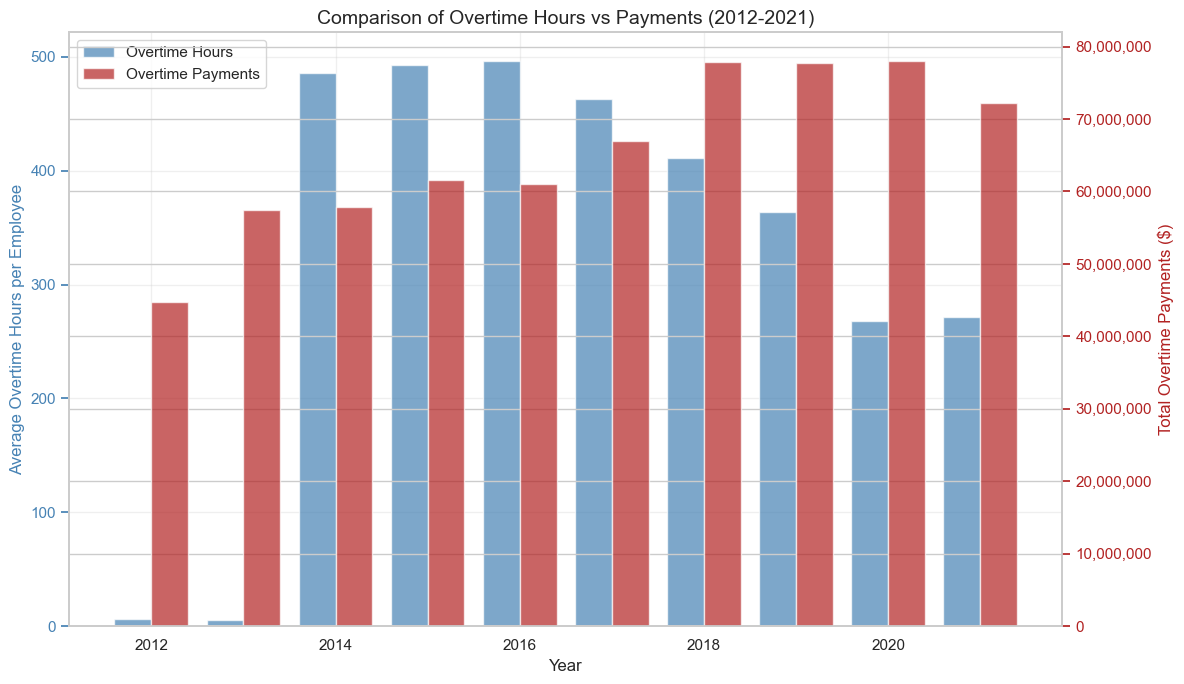

In [55]:
# Plot the data
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# Years for both datasets
years = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

# Create figure with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 7))
ax2 = ax1.twinx()

# Plot overtime hours on first axis
hours_bars = ax1.bar(np.array(years)-0.2, TotalOvertime, 0.4, color='steelblue', alpha=0.7, label='Overtime Hours')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Overtime Hours per Employee', color='steelblue')
ax1.tick_params(axis='y', colors='steelblue')

# Plot overtime payments on second axis
payment_bars = ax2.bar(np.array(years)+0.2, overtime_payments, 0.4, color='firebrick', alpha=0.7, label='Overtime Payments')
ax2.set_ylabel('Total Overtime Payments ($)', color='firebrick')
ax2.tick_params(axis='y', colors='firebrick')
ax2.ticklabel_format(style='plain', axis='y')

# Format y-axis for payments with commas for thousands
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))

# Add title and grid
plt.title('Comparison of Overtime Hours vs Payments (2012-2021)', fontsize=14)
ax1.grid(True, alpha=0.3)

# Create combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

In [69]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Years and overtime hours data (excluding 2012 and 2013)
years = np.array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])
overtime_hours = np.array(TotalOvertime[2:])  # Skip first two values (2012 and 2013)

# Reshape data for scikit-learn
X = years.reshape(-1, 1)

# Test different polynomial degrees
test_degrees = [4]
models = {}
metrics = {}
future_years = np.array(range(2014, max(years) + 5)).reshape(-1, 1)  # 4 years forecast

# Fit models of different degrees
for degree in test_degrees:
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)

    # Fit the model
    model = LinearRegression()
    model.fit(X_poly, overtime_hours)

    # Get predictions
    y_pred = model.predict(X_poly)

    # Calculate metrics
    mse = mean_squared_error(overtime_hours, y_pred)
    r2 = r2_score(overtime_hours, y_pred)

    # Store model and metrics
    models[degree] = model
    metrics[degree] = {'mse': mse, 'r2': r2}

# Find best model based on R²
best_degree = max(metrics, key=lambda k: metrics[k]['r2'])

# Create polynomial features for future years
poly_features = PolynomialFeatures(degree=best_degree)
future_poly = poly_features.fit_transform(future_years)

# Create interactive plot
fig = go.Figure()

# Add actual data points
fig.add_trace(go.Scatter(
    x=years,
    y=overtime_hours,
    mode='markers',
    name='Actual data',
    marker=dict(size=12, color='blue'),
    hovertemplate='Year: %{x}<br>Overtime: %{y:.2f} hours<extra></extra>'
))

# Add polynomial fits
colors = ['green', 'red', 'purple']
for i, degree in enumerate(models.keys()):
    model = models[degree]
    future_pred = model.predict(poly_features.transform(future_years))

    r2 = metrics[degree]['r2']
    mse = metrics[degree]['mse']

    fig.add_trace(go.Scatter(
        x=future_years.flatten(),
        y=future_pred,
        mode='lines',
        name=f'Degree {degree} (R² = {r2:.4f}, MSE = {mse:.2f})',
        line=dict(color=colors[i], width=3),
        hovertemplate='Year: %{x}<br>Predicted: %{y:.2f} hours<extra></extra>'
    ))

# Add forecast points
forecast_years = np.array(range(2022, 2026)).reshape(-1, 1)
forecast_values = models[best_degree].predict(poly_features.transform(forecast_years))

fig.add_trace(go.Scatter(
    x=forecast_years.flatten(),
    y=forecast_values,
    mode='markers+text',
    name='Forecast',
    marker=dict(size=12, color='red'),
    text=[f'{val:.1f}' for val in forecast_values],
    textposition='top center',
    hovertemplate='Year: %{x}<br>Forecast: %{y:.2f} hours<extra></extra>'
))

# Highlight forecast region
fig.add_traces([
    go.Scatter(
        x=np.concatenate([forecast_years.flatten(), forecast_years.flatten()[::-1]]),
        y=np.concatenate([forecast_values, [0] * len(forecast_values)]),
        fill='toself',
        fillcolor='rgba(128, 128, 128, 0.2)',
        line=dict(color='rgba(255,255,255,0)'),
        name='Forecast region',
        showlegend=True,
        hoverinfo='skip'
    )
])

# Add vertical line for last data point
fig.add_shape(
    type="line",
    x0=2021, y0=0, x1=2021, y1=1,
    yref='paper',
    line=dict(color="Black", width=2, dash="dash"),
    name='Last data point'
)

# Update layout
fig.update_layout(
    title={
        'text': 'Polynomial Regression Forecast of Average Overtime Hours (2014-2025)',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title='Year',
    yaxis_title='Average Overtime Hours per Employee',
    hovermode='closest',
    template='plotly_white',
    showlegend=True,
    legend=dict(
        yanchor="bottom",
        y=0.99,
        xanchor="left",
        x=0.01
    ),
    xaxis=dict(
        tickmode='linear',
        tick0=2014,
        dtick=1
    )
)

# Show plot
fig.show()